Import the dependencies

In [32]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Preprocessing 

In [33]:
# loading the csv data file in to the pandas dataframe

gold_data = pd.read_csv('d:\qtree projeccts\csv and excel files\machine learning project\gld_price_data.csv')

<>:3: SyntaxWarning: invalid escape sequence '\q'
<>:3: SyntaxWarning: invalid escape sequence '\q'
C:\Users\ANAND\AppData\Local\Temp\ipykernel_11260\4053636670.py:3: SyntaxWarning: invalid escape sequence '\q'
  gold_data = pd.read_csv('d:\qtree projeccts\csv and excel files\machine learning project\gld_price_data.csv')


In [34]:
# print the first five rows in the dataset
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [35]:
# last five rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [36]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [37]:
# get some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [38]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [39]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlatioin:

1. positive correlation

2. Negative correlation

In [40]:
correlation = gold_data.drop('Date',axis = 1).corr()

<Axes: >

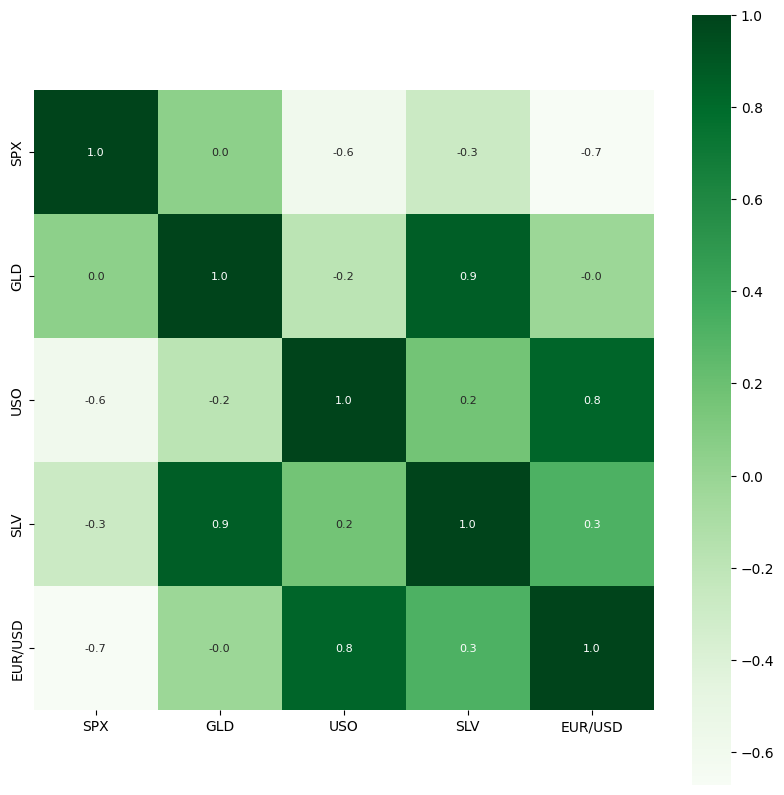

In [41]:
# Constructing the heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap="Greens" )

In [42]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


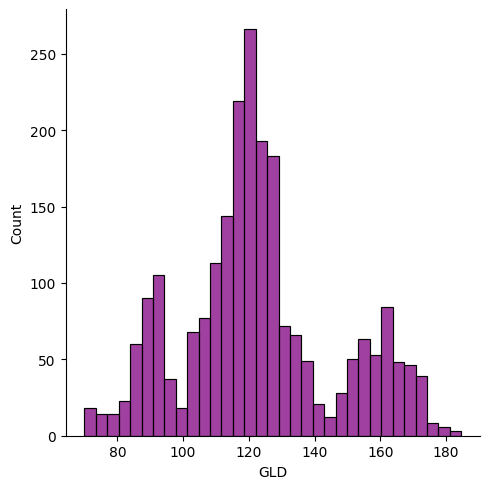

In [43]:
# checking the distribution of the GLD price

sns.displot(gold_data['GLD'], color='Purple')

Splitting the Features and Target

In [44]:
x = gold_data.drop(['Date','GLD'], axis=1)
y = gold_data['GLD']

In [45]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [46]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

Splitting into training and test data

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

Model Training:
* Random Forest Regressor

In [48]:
regressor = RandomForestRegressor()

In [49]:
# training the mmodel
regressor.fit(x_train, y_train)

RandomForestRegressor()

Model Evaluation

In [50]:
# predictin on the test data
test_data_prediction = regressor.predict(x_test)

In [51]:
test_data_prediction

array([168.74359944,  82.02110006, 116.00270015, 127.61210076,
       120.69070112, 154.81469739, 150.3186982 , 126.02700039,
       117.36539878, 126.05970042, 116.39060114, 171.71550109,
       141.70869819, 167.90579802, 115.28629988, 117.51290056,
       138.77330307, 169.69630045, 159.75570245, 158.33210007,
       155.18100001, 125.2926001 , 175.96399974, 156.89280323,
       125.17610046,  93.9792997 ,  77.03150045, 120.65330004,
       119.17909957, 167.39359946,  88.23900046, 125.27280023,
        91.19850072, 117.70990034, 121.07299947, 136.60260074,
       115.35690133, 115.00590099, 147.75089936, 107.40770098,
       104.16580237,  87.01099774, 126.49370037, 117.74530042,
       154.61999923, 119.70790013, 108.47510008, 107.83369764,
        93.18590041, 127.34919722,  75.39900008, 113.67589965,
       121.50910015, 111.38539918, 118.7645987 , 120.36329945,
       159.00750038, 167.67360122, 147.02739681,  86.09609883,
        94.45210045,  86.8676989 ,  90.50340026, 119.07

In [52]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R-Squared error: ", error_score)

R-Squared error:  0.9892002600364356


Compare the actual values and the predicted values

In [53]:
y_test = list(y_test)

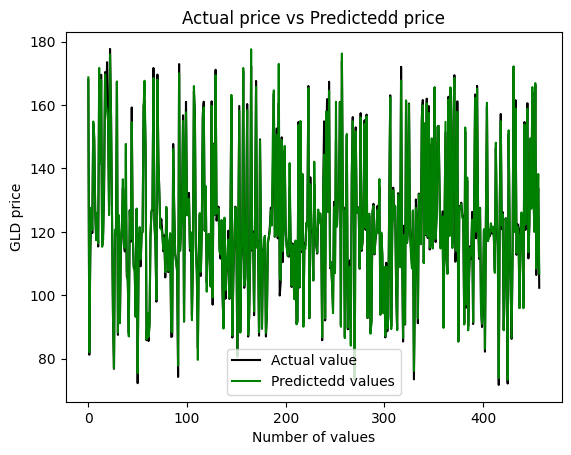

In [54]:
plt.plot(y_test, color='black', label='Actual value')
plt.plot(test_data_prediction, color='green', label='Predictedd values')
plt.title("Actual price vs Predictedd price")
plt.xlabel("Number of values")
plt.ylabel("GLD price")
plt.legend()
plt.show()

predictive system

In [62]:
# prediction
x = np.asarray([[1447.160034, 78.470001, 15.1800, 1.471692]])
#input_data = np.asarray(x)

input_data_reshaped = x.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction[0])

85.01589983999996


c:\Users\ANAND\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [63]:
import pickle

In [64]:
data = {'model':regressor}
with open("gold_price_prediction_model.pkl",'wb') as file:
    pickle.dump(data,file)